Import the event log folder to do some data analysis

In [8]:
import pandas as pd
import numpy as np

# Load the event_log file from the temp folder
event_log = pd.read_csv('./temp/event_log.csv')

# Display the first few rows of the dataframe
event_log.head()



,case_id,task_id,event_label,resource,start_time,completion_time,diagnosis
0,0,0,emergency_patient,NaN,2018-01-01 01:03:54.928082,2018-01-01 01:03:54.928082,B4
1,1,1,emergency_patient,NaN,2018-01-01 01:48:56.020099,2018-01-01 01:48:56.020099,NaN
2,0,2,ER_treatment,ER_PRACTITIONER8,2018-01-01 01:03:54.928082,2018-01-01 02:35:45.558891,NaN
3,1,4,ER_treatment,ER_PRACTITIONER1,2018-01-01 01:48:56.020099,2018-01-01 03:37:55.782698,NaN
4,1,6,releasing,NaN,2018-01-01 03:37:55.782698,2018-01-01 03:37:55.782698,NaN


First I want to analyse the arrival rates of the two patient groups. Lets split the log into arrival events and processing events:
arrival: 
- emergency_patient
- patient_referal

C:\Users\certj\AppData\Local\Temp\ipykernel_13724\3955950902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivals['start_time'] = pd.to_datetime(arrivals['start_time'])
C:\Users\certj\AppData\Local\Temp\ipykernel_13724\3955950902.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivals['month'] = arrivals['start_time'].dt.month
C:\Users\certj\AppData\Local\Temp\ipykernel_13724\3955950902.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

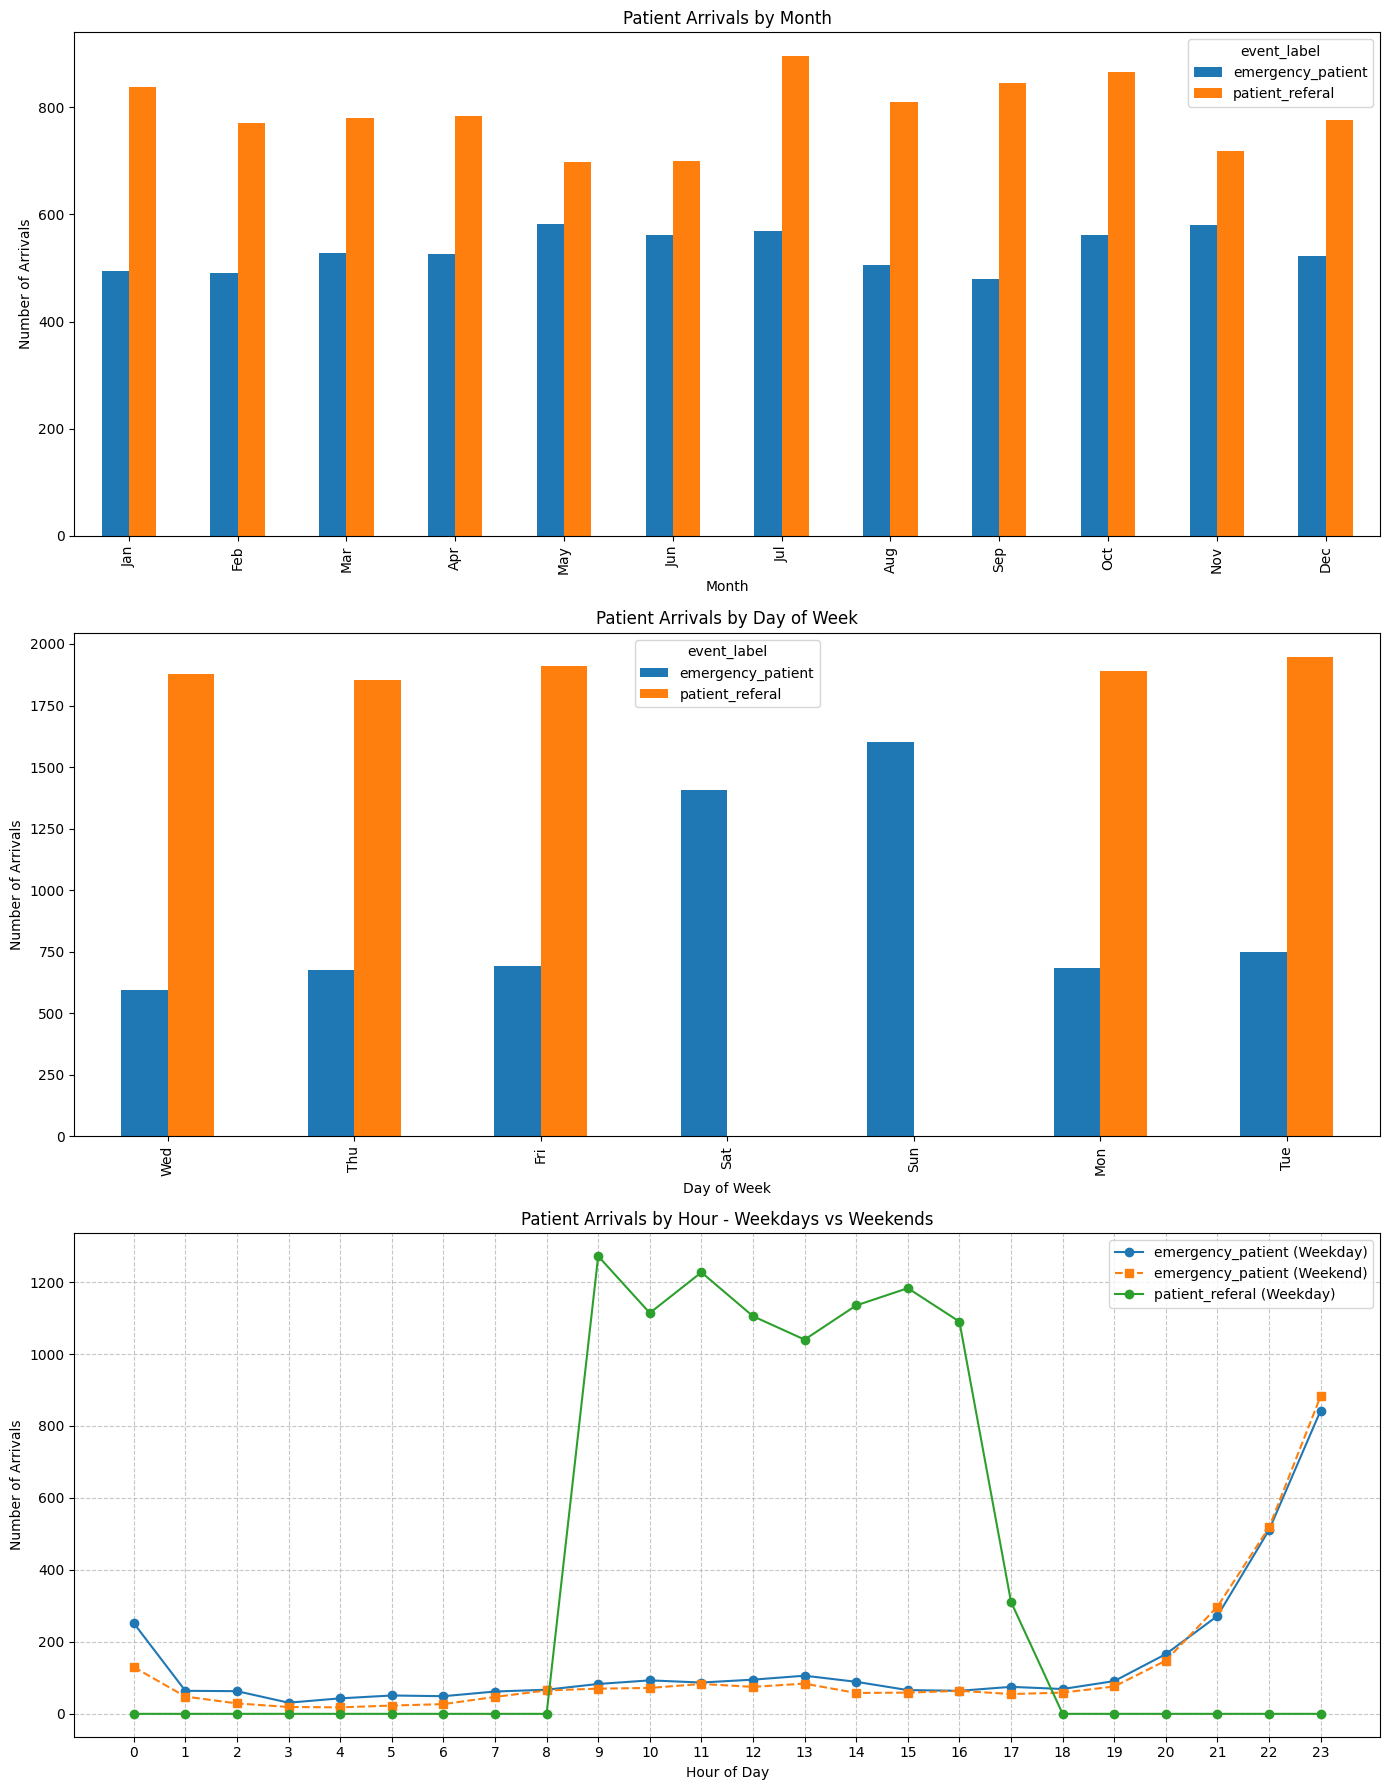

In [9]:
# Filter for arrival events
arrivals = event_log[event_log['event_label'].isin(['emergency_patient', 'patient_referal'])]

# Convert start_time to datetime if not already
arrivals['start_time'] = pd.to_datetime(arrivals['start_time'])

# Extract date components for analysis
arrivals['month'] = arrivals['start_time'].dt.month
arrivals['day_of_week'] = arrivals['start_time'].dt.dayofweek  # 0=Monday, 6=Sunday
arrivals['hour'] = arrivals['start_time'].dt.hour

# Import plotting libraries
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Monthly arrivals
monthly_data = arrivals.groupby(['month', 'event_label']).size().unstack(fill_value=0)
monthly_data.plot(kind='bar', ax=axes[0])
axes[0].set_title('Patient Arrivals by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Arrivals')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticklabels([month_names[i-1] for i in monthly_data.index])

# Plot 2: Arrivals by day of week
weekday_data = arrivals.groupby(['day_of_week', 'event_label']).size().unstack(fill_value=0)
weekday_data.plot(kind='bar', ax=axes[1])
axes[1].set_title('Patient Arrivals by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Arrivals')
day_names = ['Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue']
axes[1].set_xticklabels([day_names[i] for i in weekday_data.index])

# Plot 3: Hourly arrivals by weekday and weekend
# In this dataset, day_of_week: 0=Wed, 1=Thu, 2=Fri, 3=Sat, 4=Sun, 5=Mon, 6=Tue
weekday_arrivals = arrivals[arrivals['day_of_week'].isin([0, 1, 2, 5, 6])]  # Wed, Thu, Fri, Mon, Tue
weekend_arrivals = arrivals[arrivals['day_of_week'].isin([3, 4])]  # Sat, Sun

# Group by hour and event label for weekdays and weekends
weekday_hourly = weekday_arrivals.groupby(['hour', 'event_label']).size().unstack(fill_value=0)
weekend_hourly = weekend_arrivals.groupby(['hour', 'event_label']).size().unstack(fill_value=0)

# Plot as lines for better visibility of patterns
for column in set(weekday_hourly.columns) | set(weekend_hourly.columns):
    if column in weekday_hourly.columns:
        axes[2].plot(weekday_hourly.index, weekday_hourly[column], marker='o', linestyle='-', 
                 label=f'{column} (Weekday)')
    
    if column in weekend_hourly.columns:
        axes[2].plot(weekend_hourly.index, weekend_hourly[column], marker='s', linestyle='--', 
                 label=f'{column} (Weekend)')

axes[2].set_title('Patient Arrivals by Hour - Weekdays vs Weekends')
axes[2].set_xlabel('Hour of Day')
axes[2].set_ylabel('Number of Arrivals')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

C:\Users\certj\AppData\Local\Temp\ipykernel_13724\581680161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivals['date'] = pd.to_datetime(arrivals['start_time'].dt.date)
C:\Users\certj\AppData\Local\Temp\ipykernel_13724\581680161.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivals['is_holiday'] = arrivals['date'].apply(lambda x: x in de_holidays or x.dayofweek == 3 or x.dayofweek == 4)
C:\Users\certj\AppData\Local\Temp\ipykernel_13724\581680161.py:13: SettingWithCopyWarning: 
A value is tr

avg_arrivals                      std_arrivals  \
event_label      emergency_patient patient_referal emergency_patient   
hour day_type                                                          
0    Holiday                  1.64             NaN              0.87   
     Working Day              1.26             NaN              0.56   
1    Holiday                  1.13             NaN              0.34   
     Working Day              1.05             NaN              0.23   
2    Holiday                  1.11             NaN              0.31   
     Working Day              1.05             NaN              0.22   
3    Holiday                  1.00             NaN              0.00   
     Working Day              1.00             NaN              0.00   
4    Holiday                  1.00             NaN              0.00   
     Working Day              1.11             NaN              0.39   
5    Holiday                  1.77             NaN              1.09   
     Working Day              1.19             NaN              0.39   
6    Holiday                  1.50             NaN              0.86   
     Working Day              1.20             NaN              0.46   
7    Holiday                  1.48             NaN              0.91   
     Working Day              1.33             NaN              0.56   
8    Holiday                  1.63             NaN              0.80   
     Working Day              1.23             NaN              0.42   
9    Holiday                  1.69            4.00              1.16   
     Working Day              1.37            5.08              0.55   
10   Holiday                  1.73            4.00              1.00   
     Working Day              1.31            4.57              0.55   
11   Holiday                  1.58            5.50              0.86   
     Working Day              1.34            4.92              0.54   
12   Holiday                  1.37            4.00              0.59   
     Working Day              1.23            4.50              0.48   
13   Holiday                  1.61            4.00              0.73   
     Working Day              1.11            4.23              0.35   
14   Holiday                  1.32            1.50              0.52   
     Working Day              1.21            4.66              0.41   
15   Holiday                  1.28            6.00              0.58   
     Working Day              1.08            4.84              0.28   
16   Holiday                  1.16            7.00              0.37   
     Working Day              1.09            4.45              0.28   
17   Holiday                  1.34            2.00              0.57   
     Working Day              1.15            1.41              0.40   
18   Holiday                  1.65             NaN              0.68   
     Working Day              1.22             NaN              0.50   
19   Holiday                  1.68             NaN              1.07   
     Working Day              1.40             NaN              0.64   
20   Holiday                  2.71             NaN              1.60   
     Working Day              1.90             NaN              1.07   
21   Holiday                  4.24             NaN              2.23   
     Working Day              2.29             NaN              1.31   
22   Holiday                  6.18             NaN              2.61   
     Working Day              3.58             NaN              2.03   
23   Holiday                 10.07             NaN              3.27   
     Working Day              4.94             NaN              2.39   

                                  
event_label      patient_referal  
hour day_type                     
0    Holiday                 NaN  
     Working Day             NaN  
1    Holiday                 NaN  
     Working Day             NaN  
2    Holiday                 NaN  
     Working Day             NaN  
3    Holiday                 NaN  

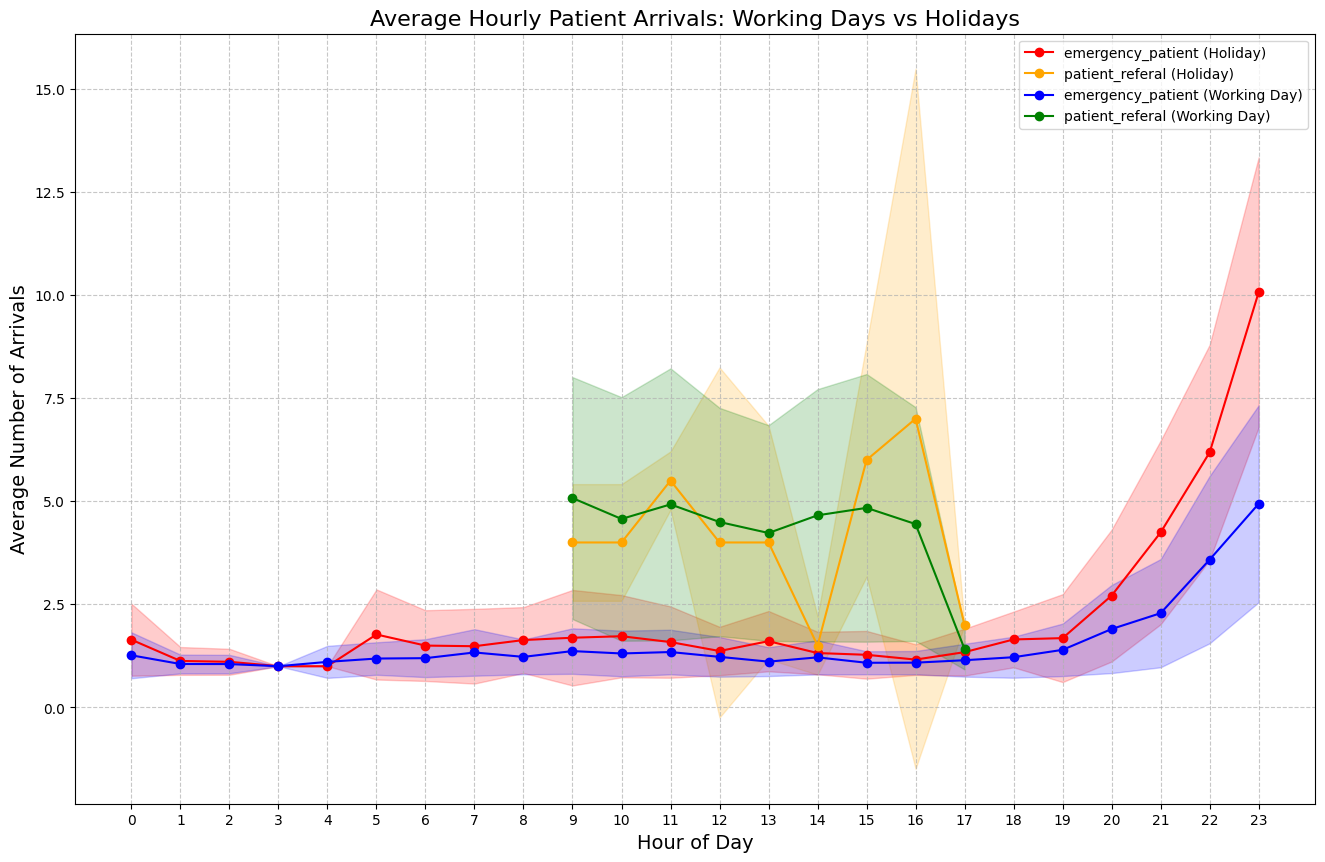

In [10]:
import pandas as pd
import holidays
from datetime import datetime

# Get German holidays for Hessen state
de_holidays = holidays.Germany(state='HE')

# Convert date from string to datetime for comparison
arrivals['date'] = pd.to_datetime(arrivals['start_time'].dt.date)

# Mark days as working days or holidays
arrivals['is_holiday'] = arrivals['date'].apply(lambda x: x in de_holidays or x.dayofweek == 3 or x.dayofweek == 4)
arrivals['day_type'] = arrivals['is_holiday'].apply(lambda x: 'Holiday' if x else 'Working Day')

# Now let's analyze the arrival patterns for working days vs holidays
# Group by hour, event_label and day_type
daily_type_arrivals = arrivals.groupby(['date', 'hour', 'event_label', 'day_type']).size().reset_index(name='count')

# Calculate statistics for each day type
hourly_type_summary = daily_type_arrivals.groupby(['hour', 'event_label', 'day_type']).agg(
    avg_arrivals=('count', 'mean'),
    min_arrivals=('count', 'min'),
    max_arrivals=('count', 'max'),
    std_arrivals=('count', 'std')
).reset_index()

# Create a figure showing working days vs holidays
plt.figure(figsize=(16, 10))

# Colors for different categories
colors = {'Working Day': {'emergency_patient': 'blue', 'patient_referal': 'green'},
          'Holiday': {'emergency_patient': 'red', 'patient_referal': 'orange'}}

# Plot lines for each combination of day type and event label
for day_type in hourly_type_summary['day_type'].unique():
    for event in hourly_type_summary['event_label'].unique():
        data = hourly_type_summary[(hourly_type_summary['day_type'] == day_type) & 
                                  (hourly_type_summary['event_label'] == event)]
        if not data.empty:  # Only plot if data exists for this combination
            plt.plot(data['hour'], data['avg_arrivals'], 
                    marker='o', linestyle='-', 
                    label=f'{event} ({day_type})',
                    color=colors[day_type][event])
            
            # Add shaded area for standard deviation
            plt.fill_between(data['hour'], 
                           data['avg_arrivals'] - data['std_arrivals'],
                           data['avg_arrivals'] + data['std_arrivals'],
                           alpha=0.2, color=colors[day_type][event])

plt.title('Average Hourly Patient Arrivals: Working Days vs Holidays', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Number of Arrivals', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Display detailed statistics
pivot_summary = pd.pivot_table(
    hourly_type_summary, 
    values=['avg_arrivals', 'std_arrivals'], 
    index=['hour', 'day_type'],
    columns=['event_label']
).round(2)

display(pivot_summary)

All event types in log: ['emergency_patient' 'ER_treatment' 'releasing' 'surgery'
 'patient_referal' 'time_for_intake' 'intake' 'nursing']


C:\Users\certj\AppData\Local\Temp\ipykernel_13724\3916577226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resource_events['start_time'] = pd.to_datetime(resource_events['start_time'])
C:\Users\certj\AppData\Local\Temp\ipykernel_13724\3916577226.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resource_events['end_time'] = pd.to_datetime(resource_events['completion_time'])
C:\Users\certj\AppData\Local\Temp\ipykernel_13724\3916577226.py:14: SettingWithCopyWarning: 
A value is trying to be set on a

,event_label,count,avg_duration,min_duration,max_duration,std_duration
0,releasing,14707,0.000000,0.000000,0.000000,0.000000
1,nursing,11625,2660.062747,180.123587,4742.754407,1684.550477
2,intake,9446,60.105419,34.340841,88.494094,7.406290
3,time_for_intake,9446,0.000000,0.000000,0.000000,0.000000
4,ER_treatment,6393,119.887528,8.189629,221.088724,29.960056
5,surgery,4364,174.490893,0.000000,424.589031,89.279422


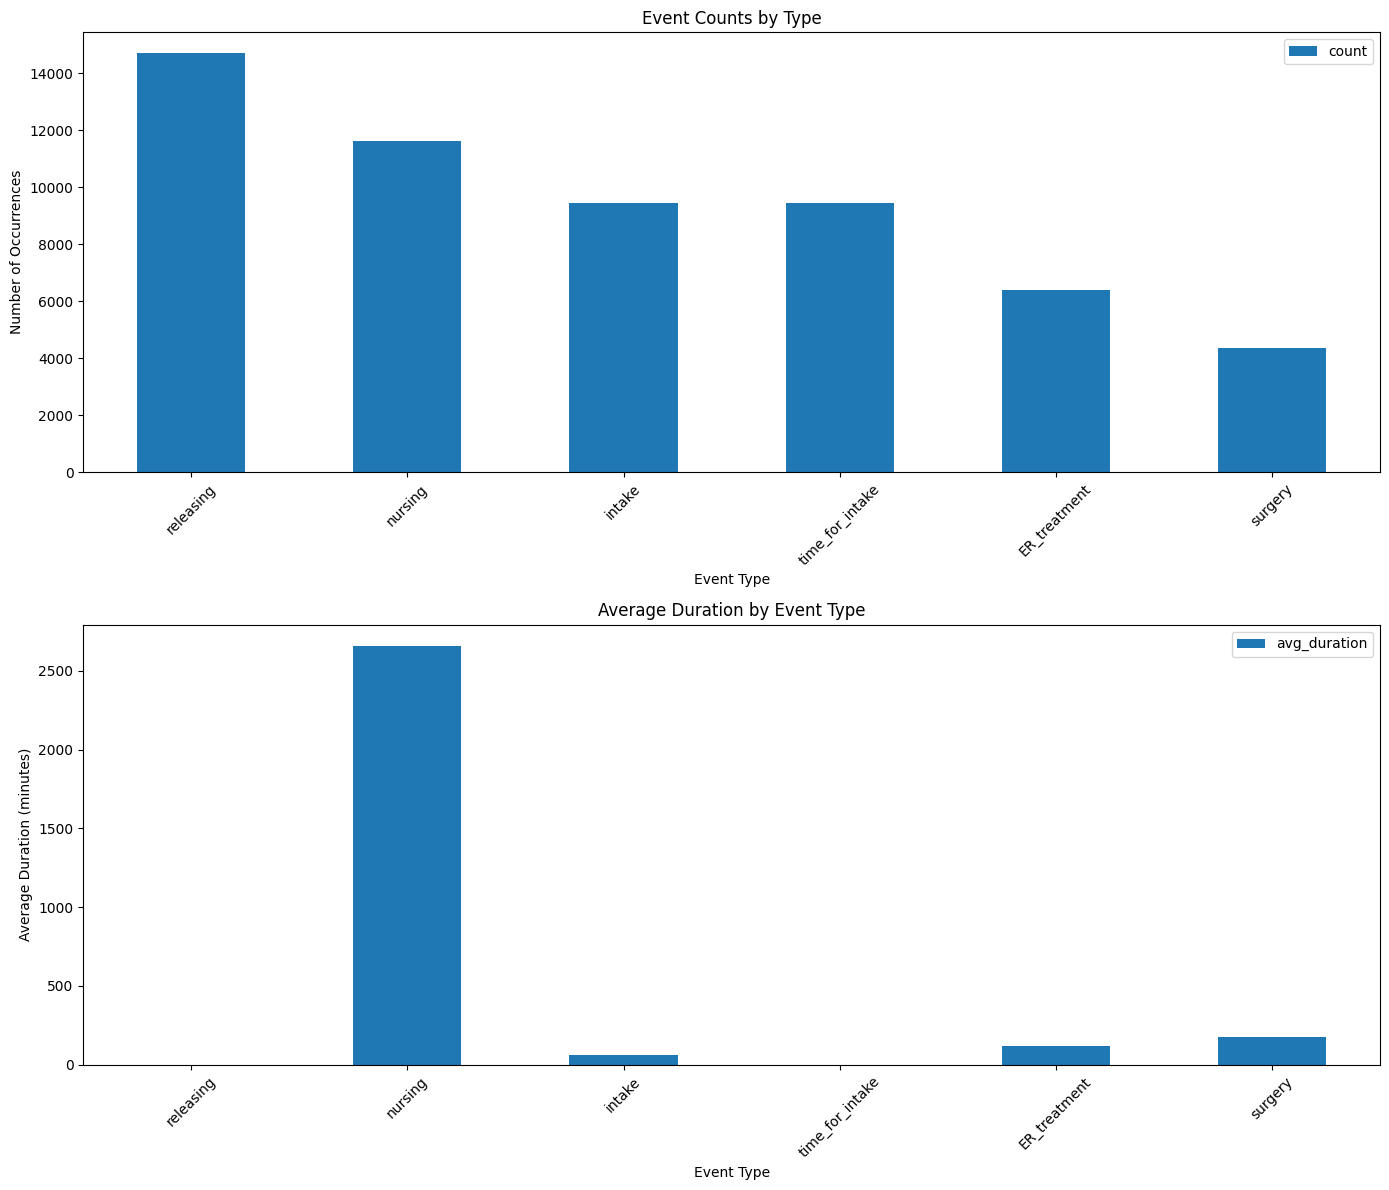

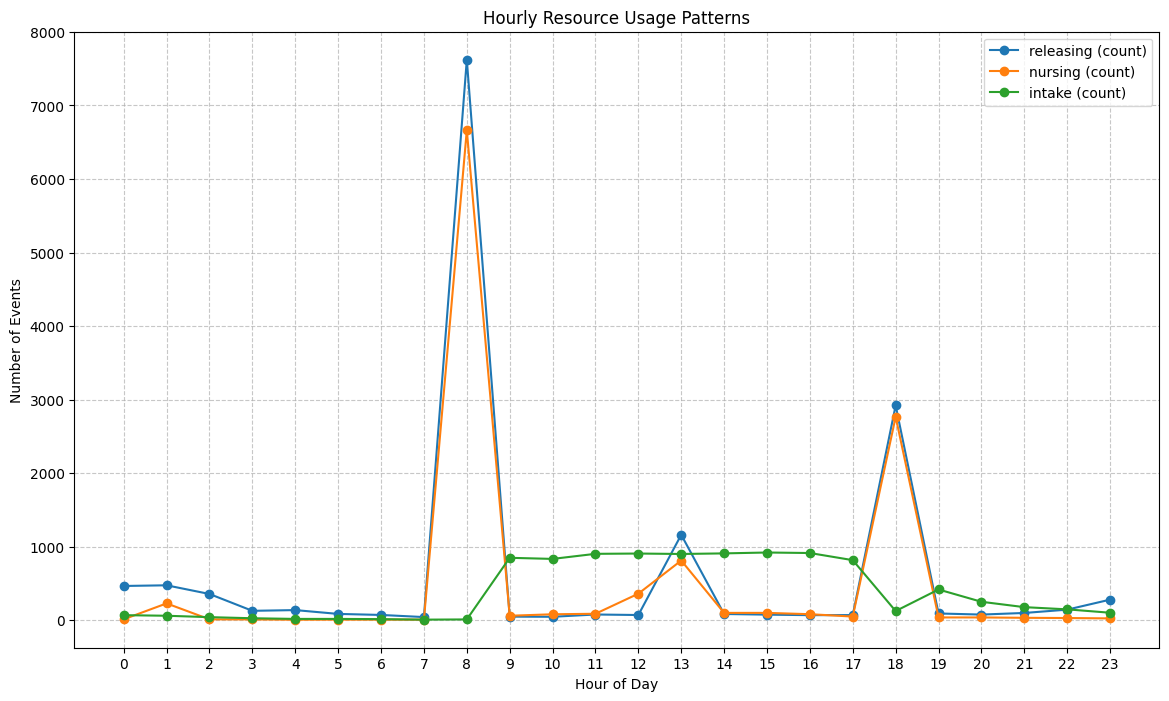

In [11]:
# First, let's see all the unique event labels in our event log
event_types = event_log['event_label'].unique()
print(f"All event types in log: {event_types}")

# Filter for non-arrival events (everything except emergency_patient and patient_referal)
arrival_events = ['emergency_patient', 'patient_referal']
resource_events = event_log[~event_log['event_label'].isin(arrival_events)]

# Convert time columns to datetime if not already
resource_events['start_time'] = pd.to_datetime(resource_events['start_time'])
resource_events['end_time'] = pd.to_datetime(resource_events['completion_time'])

# Calculate duration for each event
resource_events['duration_minutes'] = (resource_events['end_time'] - resource_events['start_time']).dt.total_seconds() / 60

# Add time components for analysis
resource_events['hour'] = resource_events['start_time'].dt.hour
resource_events['date'] = resource_events['start_time'].dt.date
resource_events['day_of_week'] = resource_events['start_time'].dt.dayofweek

# Basic statistics on resource usage
resource_stats = resource_events.groupby('event_label').agg(
    count=('event_label', 'count'),
    avg_duration=('duration_minutes', 'mean'),
    min_duration=('duration_minutes', 'min'),
    max_duration=('duration_minutes', 'max'),
    std_duration=('duration_minutes', 'std')
).sort_values('count', ascending=False).reset_index()

display(resource_stats)

# Create a figure to show resource usage patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Event counts by type
resource_stats.plot(kind='bar', x='event_label', y='count', ax=axes[0])
axes[0].set_title('Event Counts by Type')
axes[0].set_xlabel('Event Type')
axes[0].set_ylabel('Number of Occurrences')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Average duration by event type
resource_stats.plot(kind='bar', x='event_label', y='avg_duration', ax=axes[1])
axes[1].set_title('Average Duration by Event Type')
axes[1].set_xlabel('Event Type')
axes[1].set_ylabel('Average Duration (minutes)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analyze hourly patterns for the top 3 most common resource events
top_events = resource_stats['event_label'].head(3).tolist()
top_resources = resource_events[resource_events['event_label'].isin(top_events)]

# Group by hour and event type
hourly_usage = top_resources.groupby(['hour', 'event_label']).agg(
    count=('event_label', 'count'),
    avg_duration=('duration_minutes', 'mean')
).reset_index()

plt.figure(figsize=(14, 8))
for event in top_events:
    event_data = hourly_usage[hourly_usage['event_label'] == event]
    plt.plot(event_data['hour'], event_data['count'], marker='o', label=f'{event} (count)')

plt.title('Hourly Resource Usage Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

C:\Users\certj\AppData\Local\Temp\ipykernel_13724\1812433771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_treatments['hour_decimal'] = er_treatments['start_time'].dt.hour + er_treatments['start_time'].dt.minute/60


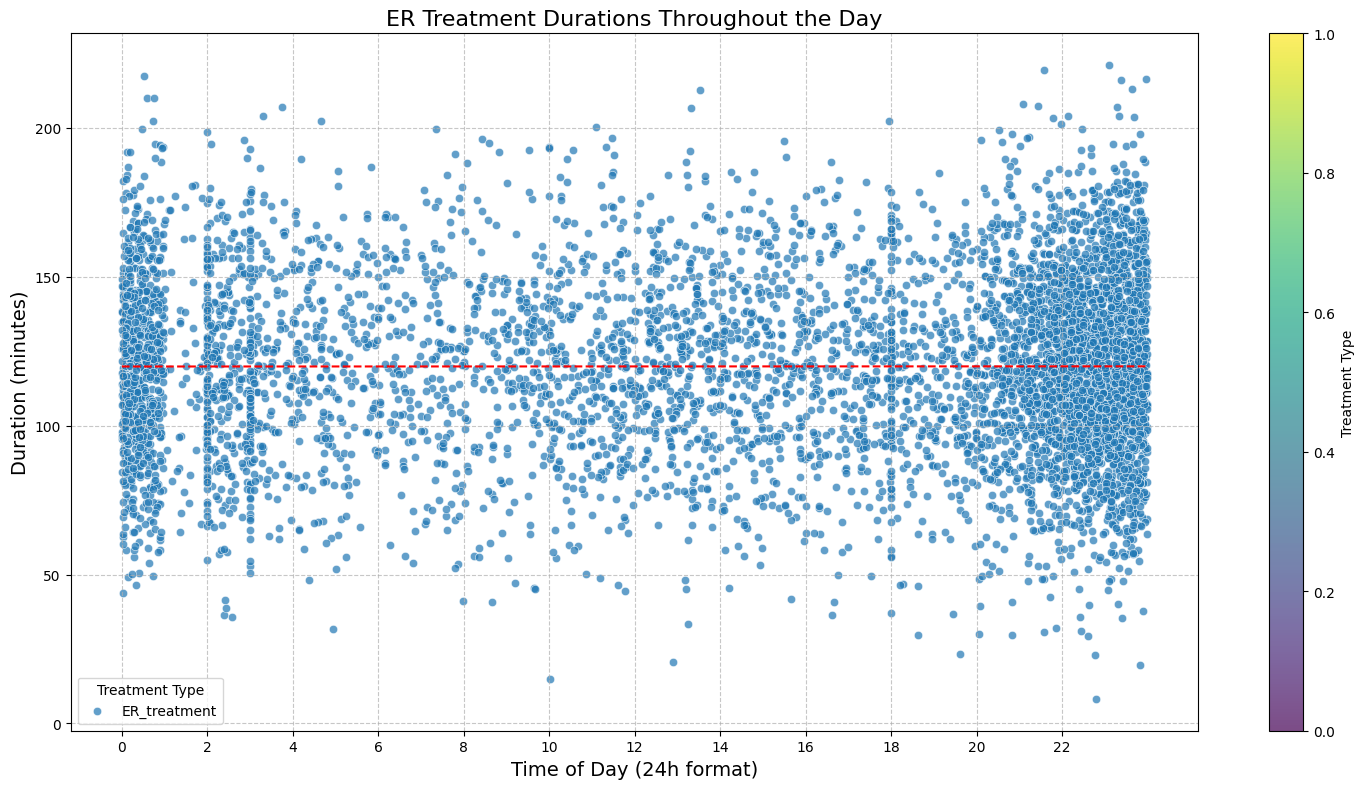

In [12]:
# Filter for treatment events (assuming treatments have 'treat' in their labels)
er_treatments = resource_events[resource_events['event_label'].str.contains('treat', case=False)]

# Create a scatter plot of treatment durations throughout the day
plt.figure(figsize=(15, 8))

# Convert start_time to hours with minutes for more precise plotting
er_treatments['hour_decimal'] = er_treatments['start_time'].dt.hour + er_treatments['start_time'].dt.minute/60

# Color points by treatment type
treatment_types = er_treatments['event_label'].unique()
for treatment_type in treatment_types:
    subset = er_treatments[er_treatments['event_label'] == treatment_type]
    plt.scatter(subset['hour_decimal'], subset['duration_minutes'], 
                alpha=0.7, label=treatment_type, edgecolors='w', linewidths=0.5)

# Add visualization elements
plt.title('ER Treatment Durations Throughout the Day', fontsize=16)
plt.xlabel('Time of Day (24h format)', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Treatment Type')
plt.colorbar(label='Treatment Type')

# Add a trend line to see patterns
plt.plot(np.unique(er_treatments['hour_decimal']), 
         np.poly1d(np.polyfit(er_treatments['hour_decimal'], er_treatments['duration_minutes'], 1))(np.unique(er_treatments['hour_decimal'])),
         color='red', linestyle='--', label='Trend')

plt.tight_layout()
plt.show()

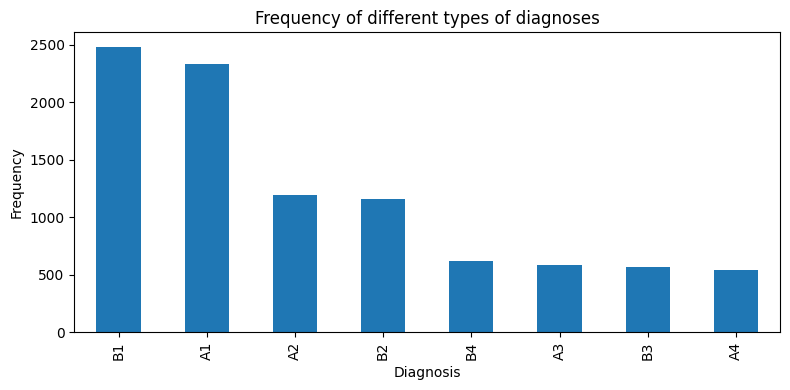

In [13]:
diagnosis_events = event_log[event_log['event_label'] == 'patient_referal']

# Count how often a diagnosis was given
diagnosis_counts = diagnosis_events['diagnosis'].value_counts()

# Plot
plt.figure(figsize=(8, 4))
diagnosis_counts.plot(kind='bar')
plt.title("Frequency of different types of diagnoses")
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

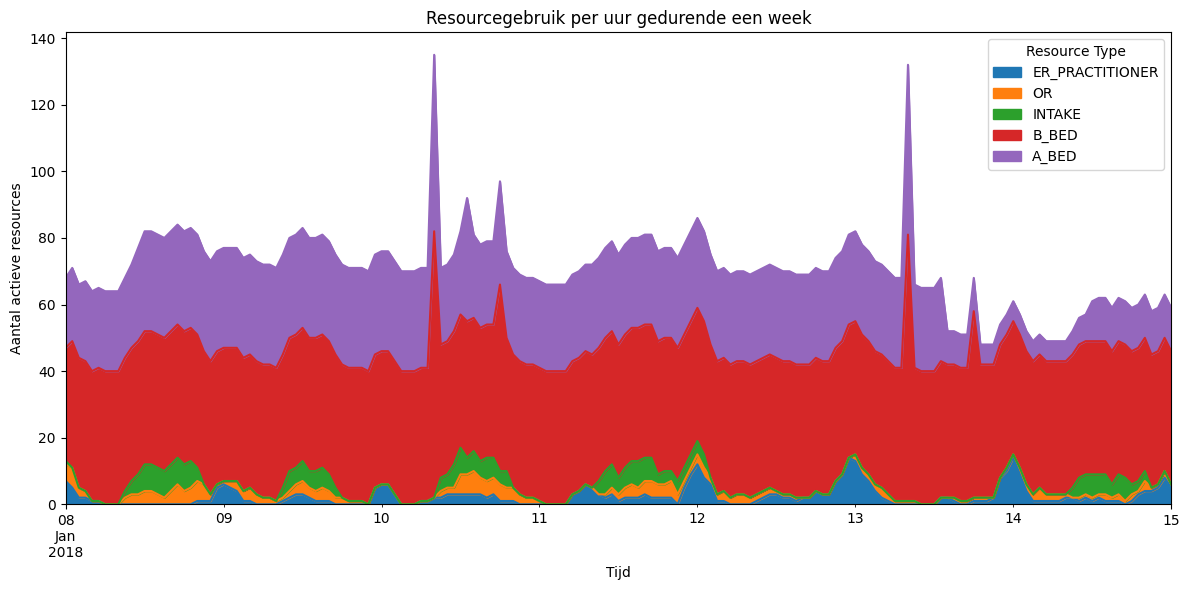

In [14]:
import re

# Convert timestamps to datetimes
event_log['start_time'] = pd.to_datetime(event_log['start_time'], format='%Y-%m-%d %H:%M:%S.%f')
event_log['completion_time'] = pd.to_datetime(event_log['completion_time'], format='%Y-%m-%d %H:%M:%S.%f')

# Filter rows that represent an actual resource activity (where start and completion differ)
df_tasks = event_log[event_log['start_time'] != event_log['completion_time']].copy()

# Extract the resource type (e.g., 'OR', 'A_BED', etc.) from the resource column
df_tasks['resource_type'] = df_tasks['resource'].apply(lambda x: ''.join(re.findall(r'[A-Z_]+', str(x))))

# Determine the week to analyze. Here the week is started on the day of the first task.
start_week = pd.to_datetime('2018-01-08')
end_week = start_week + pd.Timedelta(days=7)

# Create a time series with hourly frequency within the chosen week
hours = pd.date_range(start=start_week, end=end_week, freq='h')

# Set up a DataFrame for the resource counts; the columns are the different resource types
resource_types = df_tasks['resource_type'].unique()
usage = pd.DataFrame(0, index=hours, columns=resource_types)

# For each task: for each hourly time step within the task duration, add 1 to the corresponding resource type
for idx, row in df_tasks.iterrows():
    task_start = row['start_time']
    task_end = row['completion_time']
    
    # Ignore tasks completely outside the analysis week
    if task_end < start_week or task_start > end_week:
        continue

    # Make sure the task duration is within the analysis week
    task_start = max(task_start, start_week)
    task_end = min(task_end, end_week)
    
    # Create an hourly time series for the duration of this task
    task_hours = pd.date_range(start=task_start.floor('h'), end=task_end, freq='h')
    
    # Count per hour the task
    for h in task_hours:
        if h in usage.index:
            usage.loc[h, row['resource_type']] += 1

# plot
usage.plot.area(figsize=(12, 6))
plt.xlabel('Tijd')
plt.ylabel('Aantal actieve resources')
plt.title('Resourcegebruik per uur gedurende een week')
plt.legend(title='Resource Type')
plt.tight_layout()
plt.show()